<a href="https://colab.research.google.com/github/nhuttran1356/CNN-/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
x_train.shape # 50000 anh co kich thuoc 32x32


169017344/169001437 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

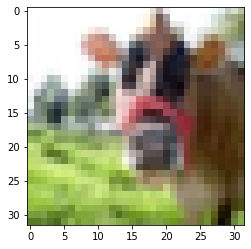

In [ ]:

plt.imshow(x_train[0])


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(100, activation = 'softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD 
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(opt, loss = 'categorical_crossentropy', metrics= 'accuracy' )
losting = model.fit(x_train,y_train,epochs= 20, batch_size =128, validation_data=(x_test,y_test), verbose = 1)
#(doi tuong1 ,doi tuong2 , so lan hoc, gioi han du lieu hoc,doi tuong hoc , dau ra )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
391/391 [==============================] - 16s 14ms/step - loss: 4.1342 - accuracy: 0.0759 - val_loss: 3.7408 - val_accuracy: 0.1426
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 3.3915 - accuracy: 0.1960 - val_loss: 3.1577 - val_accuracy: 0.2364
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 2.9217 - accuracy: 0.2816 - val_loss: 2.8332 - val_accuracy: 0.3041
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 2.5466 - accuracy: 0.3567 - val_loss: 2.6241 - val_accuracy: 0.3467
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 2.2155 - accuracy: 0.4277 - val_loss: 2.5293 - val_accuracy: 0.3734
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 1.8746 - accuracy: 0.5019 - val_loss: 2.5628 - val_accuracy: 0.3762
Epoch 7/20
391/391 [==============================] - 5s 13ms/step - loss: 1.5127 - accuracy: 0.5867 - val_loss: 2.7732 - val_accuracy: 0.368

In [ ]:
#save model after training
model.save('final_cifar100.h5')

In [1]:
#load model 
from keras.models import load_model
model =load_model('/content/drive/MyDrive/final_cifar100.h5')

[88]
tiger


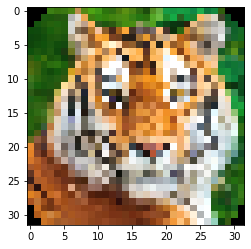

In [7]:
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from keras_preprocessing import image

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 
         'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
         'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
         'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 
         'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 
         'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
         'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
         'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 
         'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
         'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
         'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 
         'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

test_image = image.load_img('/content/tiger.jpg', target_size=(32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
result1 = np.argmax(result,axis = 1)
print(result1)
result1 = result[0]
for y in range(100):
    if result1[y] == 1.:
        break
prediction = classes[y]
print(prediction)